# Credit Card Fraud Detection

In this exercise, I'm going to attempt identifying fraudulent credit card transactions and help better educate myself on machine learning components.

1. Read the Data
2. Exploratory Data Analysis
3. Preprocessing
4. Create Test/Train Data
5. Data Processing
6. Model Training
7. Make Predictions on Test Data
8. Conclusion
9. Enhancements

Sources used will be shared throughout the notebook.

In [1]:
%pip install -q -r ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


## 1. Read the Data

We will be using the data provided here: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Let's pull the data into a Pandas dataframe. 

In [2]:
import pandas as pd
import warnings
import zipfile

warnings.filterwarnings("ignore")

with zipfile.ZipFile('./data/creditcard.csv.zip') as z:
    with z.open('creditcard.csv') as f:
        data = pd.read_csv(f, header=0)

## 2. Exploratory Data Analysis

Let's do an initial assessment of the data.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Note: Column names are not intuitive. However, according to the author of this particular data set on Kaggle:
<blockquote>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</blockquote>
Based on the above, it looks like the "Class" column is the target, and the rest are features.

In [4]:
# Confirm the data types as provided in the above blockquote
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Since all of the columns are numerical, let's print statistics for them
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As confirmed, the Class column is significantly imbalanced.

Separate model features and model target.

In [6]:
model_features = data.columns.drop('Class')
model_target = 'Class'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Model target:  Class


### Target Analysis
Let's take a look at the target distribution in a chart.

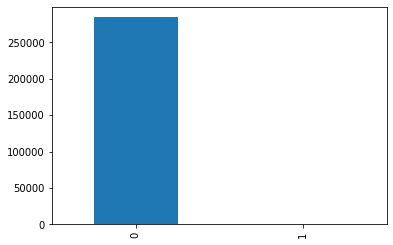

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

data[model_target].value_counts().plot.bar()
plt.show()

As expected, that's not very useful. Let's just print the value counts.

In [8]:
data[model_target].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As mentioned before, there's a significant imbalance in the target data. This will be addressed later as we only want to do that for the training set.

### Feature Analysis
Let's take a look at the features. Given the amount of data provided, let's just stick with quantitative analysis.

In [9]:
data[model_features].isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

The above indicates that there are no missing values, but that does not mean that the data is complete. For instance, they could have placed zero values instead of "NaN".

In [10]:
import numpy as np

# Scatter and density plots (grabbed from Kaggle)
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

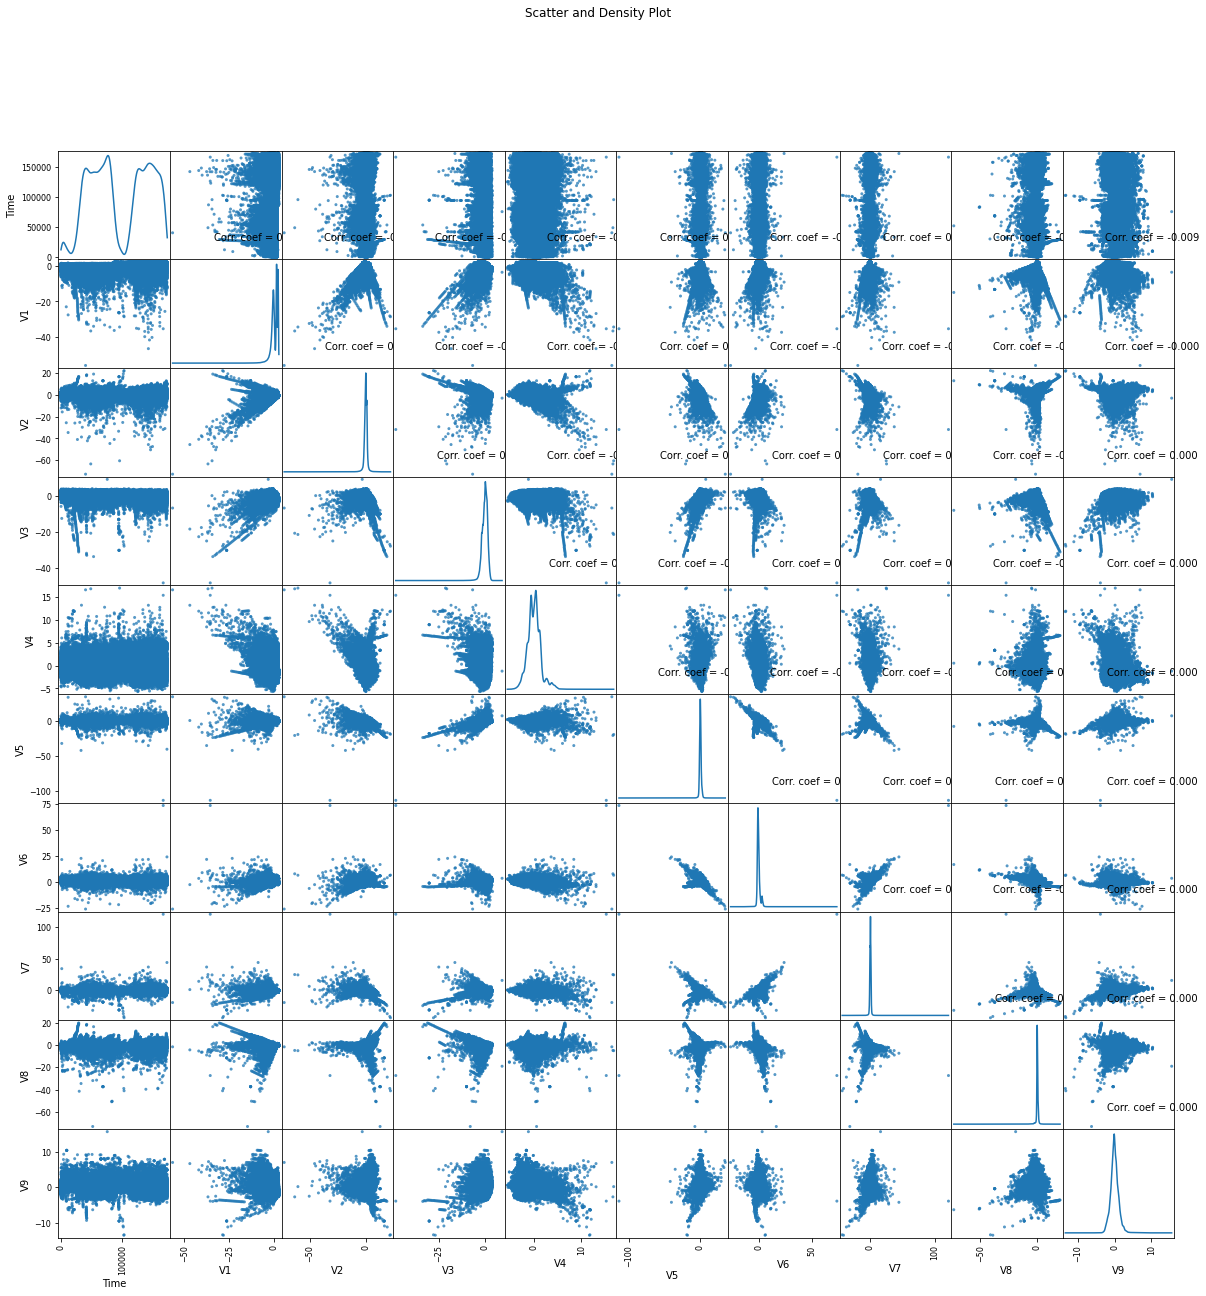

In [11]:
plotScatterMatrix(data, 20, 10)

I'm also curious about the distribution of the features that we do know about: transaction amount and transaction time.

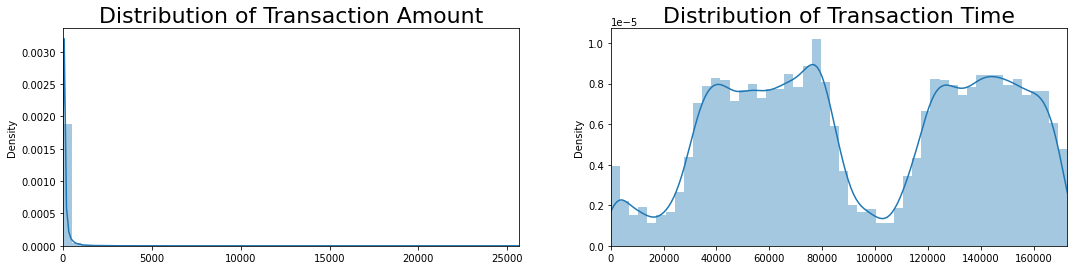

In [12]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18,4))

# Grab the two features
amount_val = data['Amount'].values
time_val = data['Time'].values


sns.distplot(
    amount_val, 
    ax=axes[0]
)
axes[0].set_title('Distribution of Transaction Amount', fontsize=22)
axes[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(
    time_val, 
    ax=axes[1]
)
axes[1].set_title('Distribution of Transaction Time', fontsize=22)
axes[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## 3. Pre-Processing Data

In looking at the feature columns, it appears that we need to do the same scaling of the Time and Amount columns that was done for the other features.

We will be using RobustScaler as it is less prone to outliers.

Reference: https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/

In [13]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Drop the original Amount and Time columns as we don't need them anymore
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## 4. Create Test/Train Data

Let's split our dataset into training and test subsets.

Stratified K-fold cross-validator is used to provide train/test indices to split data into train/test sets.

In [14]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold

X = data.drop(model_target, axis=1)
y = data[model_target]

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print('Train: ', train_index, 'Test: ', test_index)
    original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
    original_y_train, original_y_test = y.iloc[train_index], y.iloc[train_index]

train_data, test_data = train_test_split(data, test_size=0.1, shuffle=True, random_state=23)

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]


In [15]:
# Need to turn these into an array
original_X_train_values = original_X_train.values
original_X_test_values = original_X_test.values
original_y_train_values = original_y_train.values
original_y_test_values = original_y_test.values

# Confirm that both the test and train data are similarly distributed for optimal training
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)

In [16]:
print('Label Distributions: \n')
print(train_counts_label/len(original_y_train))
print(test_counts_label/len(original_y_test))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827076 0.00172924]


### Balancing the Train Data
Remember how the target outcomes were so imbalanced? Now it's time to even it out.

In [17]:
print('Training set shape: ', train_data.shape)

print('Class 0 samples in the training set: ', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set: ', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set: ', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set: ', sum(test_data[model_target] == 1))

Training set shape:  (256326, 31)
Class 0 samples in the training set:  255881
Class 1 samples in the training set:  445
Class 0 samples in the test set:  28434
Class 1 samples in the test set:  47


We only need to fix the imbalance in the training set and leave the validation/test datasets alone.

In [18]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_1_no = class_1_no.sample(n=len(class_0_no), replace=True, random_state=42)

train_data = pd.concat([class_0_no, upsampled_class_1_no])
train_data = shuffle(train_data)

print('Training set shape: ', train_data.shape)

print('Class 0 samples in the training set: ', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set: ', sum(train_data[model_target] == 1))

Training set shape:  (511762, 31)
Class 0 samples in the training set:  255881
Class 1 samples in the training set:  255881


Much better, now the data isn't imbalanced anymore. Let's take a look at correlation.

## 5. Feature Selection
Reading correlation values can help us determine which features - despite us not knowing what most of them mean - impact the outcome in a negative or positive way.

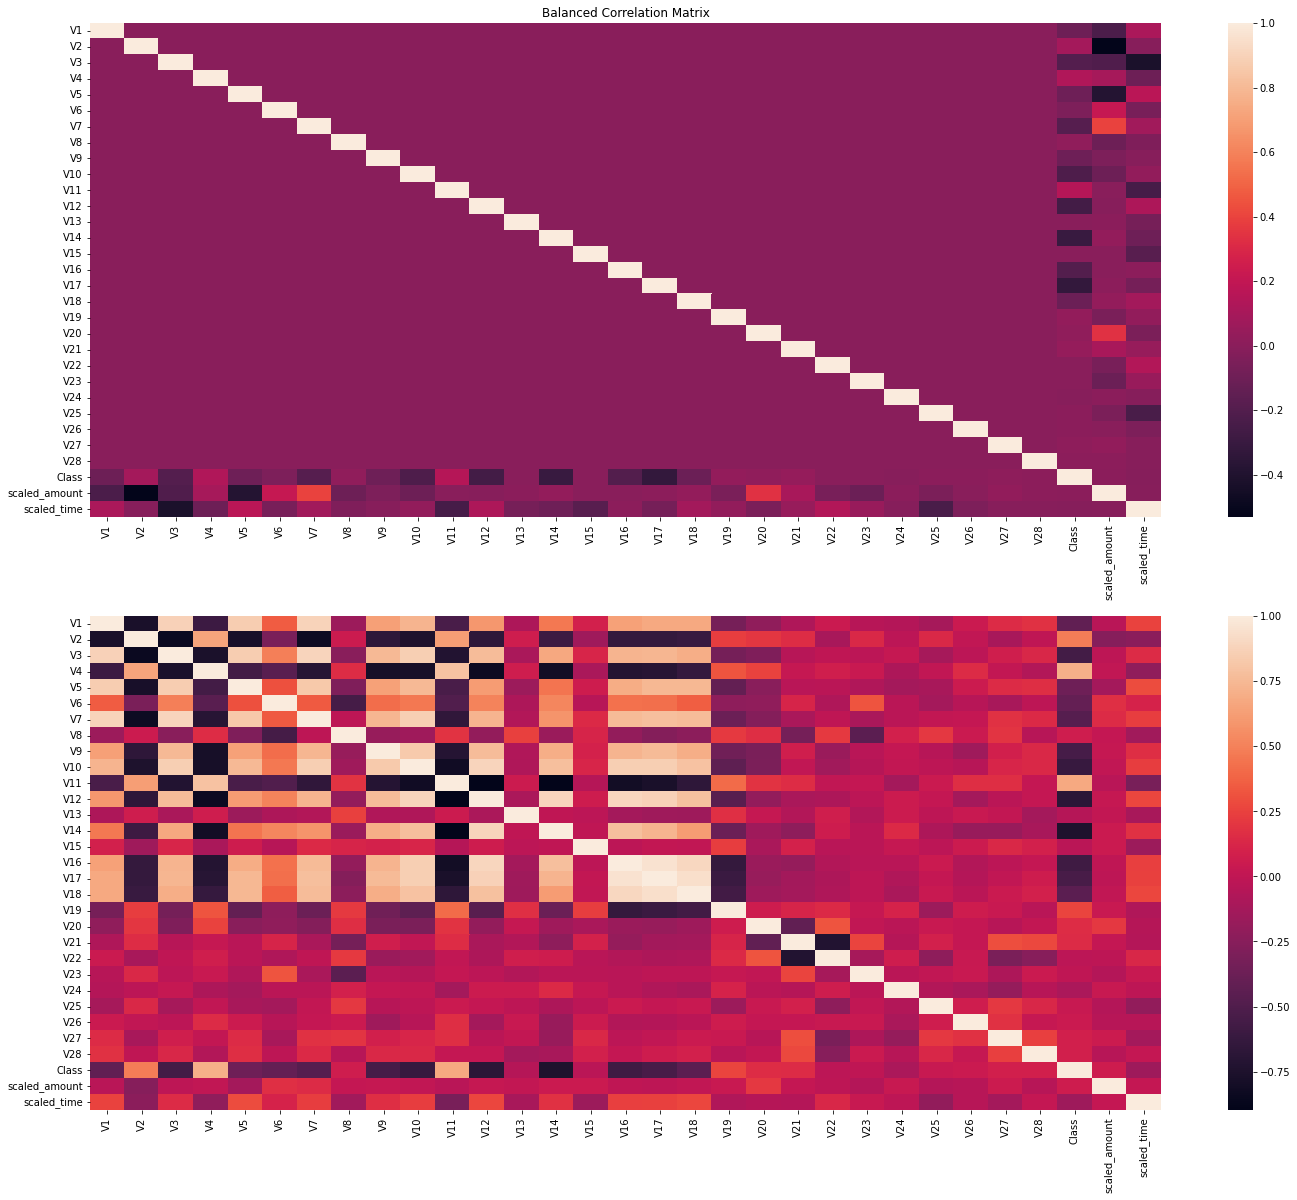

In [19]:
f, (axis_1, axis_2) = plt.subplots(2, 1, figsize=(24,20))

# Compare imbalanced and balanced dataframes
corr = data.corr()
sns.heatmap(corr, annot_kws={'size':20}, ax=axis_1)
axis_1.set_title('Imbalanced Correlation Matrix')

new_corr = train_data.corr()
sns.heatmap(new_corr, annot_kws={'size':20}, ax=axis_2)
axis_1.set_title('Balanced Correlation Matrix')

plt.show()

Based on the correlation graph for the upsampled data, the following have a negative correlation:
- V10
- V12
- V14

And the following have a positive correlation:
- V4
- V11
- V2 (let's try it)

## 5. Data Processing

Now we need to process the data in the features that we've selected. This involves removing extreme "outliers" which should improve the accuracy of our models. But first, let's create some visualizations and see what we're dealing with here.

Some of the steps were inspired by a Kaggle notebook: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

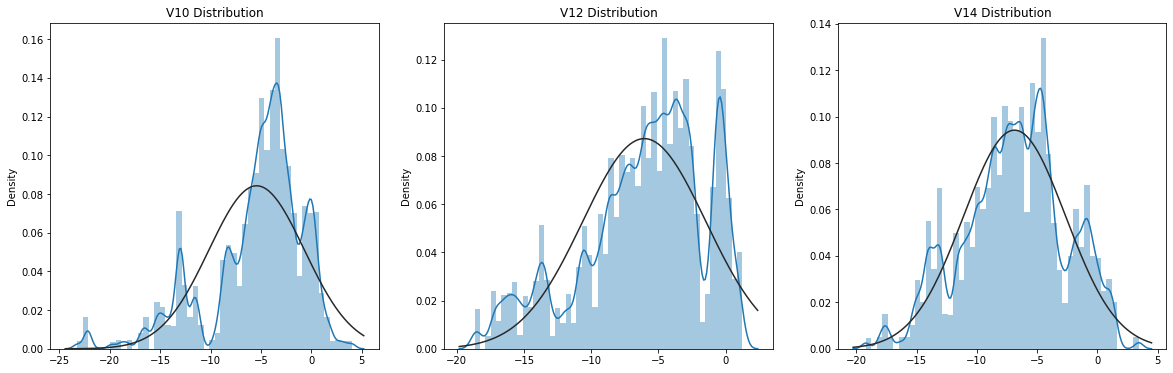

In [20]:
from scipy.stats import norm

f, (axis_1, axis_2, axis_3) = plt.subplots(1, 3, figsize=(20, 6))

# negative correlations first
v10_data = train_data['V10'].loc[train_data['Class'] == 1].values
sns.distplot(v10_data, ax=axis_1, fit=norm)
axis_1.set_title('V10 Distribution')

v12_data = train_data['V12'].loc[train_data['Class'] == 1].values
sns.distplot(v12_data, ax=axis_2, fit=norm)
axis_2.set_title('V12 Distribution')

v14_data = train_data['V14'].loc[train_data['Class'] == 1].values
sns.distplot(v14_data, ax=axis_3, fit=norm)
axis_3.set_title('V14 Distribution')

plt.show()

As you can see, V14 has the most "near perfect" Gaussian distribution compared the others. Now we're going to use the Interquartile Range.

### Interquarter Range (IQR)

The interquarter range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.

An observation can be defined as an outlier if it is 1.5 times the interquartile range greater than Q3 or 1.5 times the interquartile range less than Q1.

Source: https://en.wikipedia.org/wiki/Interquartile_range

Alternative: using z-scores to identify outliers is an option as well.

In [21]:
# Calculate IQR for v10
v10_q1 = np.percentile(v10_data, 25)
v10_q3 = np.percentile(v10_data, 75)
v10_iqr = v10_q3 - v10_q1
print(f"Q1: {v10_q1}, Q3: {v10_q3}")
print(f"IQR for V10: {v10_iqr} \n")

# Calculate IQR for v12
v12_q1 = np.percentile(v12_data, 25)
v12_q3 = np.percentile(v12_data, 75)
v12_iqr = v12_q3 - v12_q1
print(f"Q1: {v12_q1}, Q3: {v12_q3}")
print(f"IQR for V12: {v12_iqr} \n")

# Calculate IQR for v14
v14_q1 = np.percentile(v14_data, 25)
v14_q3 = np.percentile(v14_data, 75)
v14_iqr = v14_q3 - v14_q1
print(f"Q1: {v14_q1}, Q3: {v14_q3}")
print(f"IQR for V14: {v14_iqr} \n")

Q1: -7.33437708370839, Q3: -2.33593332652232
IQR for V10: 4.99844375718607 

Q1: -8.60164826276464, Q3: -2.81888227036892
IQR for V12: 5.782765992395719 

Q1: -9.56016927087188, Q3: -4.21175592358692
IQR for V14: 5.34841334728496 



In [22]:
def generate_cutoffs(iqr, q3, q1):
    cut_off = iqr * 1.5
    lower_limit = q1 - cut_off
    upper_limit = q3 + cut_off
    
    return lower_limit, upper_limit

In [23]:
# Generate cutoff limits: v10
v10_lower_limit, v10_upper_limit = generate_cutoffs(v10_iqr, v10_q3, v10_q1)
print(f"V10 lower: {v10_lower_limit}, upper: {v10_upper_limit}")

# Generate cutoff limits: v12
v12_lower_limit, v12_upper_limit = generate_cutoffs(v12_iqr, v12_q3, v12_q1)
print(f"V12 lower: {v12_lower_limit}, upper: {v12_upper_limit}")

# Generate cutoff limits: v14
v14_lower_limit, v14_upper_limit = generate_cutoffs(v14_iqr, v14_q3, v14_q1)
print(f"V14 lower: {v14_lower_limit}, upper: {v14_upper_limit}")

V10 lower: -14.832042719487497, upper: 5.161732309256785
V12 lower: -17.27579725135822, upper: 5.855266718224659
V14 lower: -17.58278929179932, upper: 3.8108640973405192


In [24]:
# Identify outliers: V10
v10_outliers = [x for x in v10_data if x < v10_lower_limit or x > v10_upper_limit]
print(f"V10: number of outliers: {len(v10_outliers)}")

# Identify outliers: V12
v12_outliers = [x for x in v12_data if x < v12_lower_limit or x > v12_upper_limit]
print(f"V12: number of outliers: {len(v12_outliers)}")

# Identify outliers: V14
v14_outliers = [x for x in v14_data if x < v14_lower_limit or x > v14_upper_limit]
print(f"V14: number of outliers: {len(v14_outliers)}")

V10: number of outliers: 12603
V12: number of outliers: 2250
V14: number of outliers: 2320


In [25]:
# Completely remove the outliers from the data set: V10
train_data = train_data.drop(
    train_data[
        (train_data['V10'] > v10_upper_limit) | (train_data['V10'] < v10_lower_limit)
    ].index)

# Completely remove the outliers from the data set: V12
train_data = train_data.drop(
    train_data[
        (train_data['V12'] > v12_upper_limit) | (train_data['V12'] < v12_lower_limit)
    ].index)

# Completely remove the outliers from the data set: V14
train_data = train_data.drop(
    train_data[
        (train_data['V14'] > v14_upper_limit) | (train_data['V14'] < v10_lower_limit)
    ].index)

Let's see how the data looks afterwards.

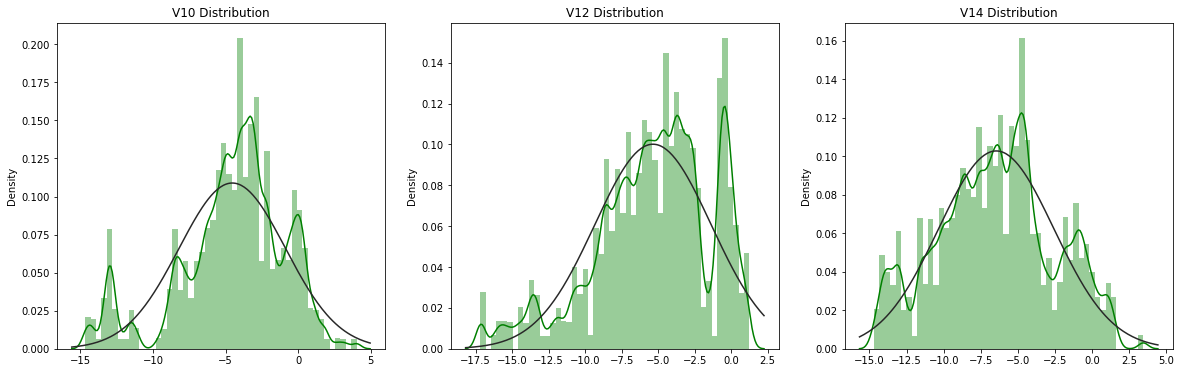

In [26]:
f, (axis_1, axis_2, axis_3) = plt.subplots(1, 3, figsize=(20, 6))

# negative correlations first
v10_data = train_data['V10'].loc[train_data['Class'] == 1].values
sns.distplot(v10_data, ax=axis_1, fit=norm, color='g')
axis_1.set_title('V10 Distribution')

v12_data = train_data['V12'].loc[train_data['Class'] == 1].values
sns.distplot(v12_data, ax=axis_2, fit=norm, color='g')
axis_2.set_title('V12 Distribution')

v14_data = train_data['V14'].loc[train_data['Class'] == 1].values
sns.distplot(v14_data, ax=axis_3, fit=norm, color='g')
axis_3.set_title('V14 Distribution')

plt.show()

Looks a bit better! Now let's do it for the positive correlation features.

TODO: do the above steps but for the positive correlation features (create functions to reduce code).

## Model Training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

selected_features = ['V10', 'V12', 'V14', 'V2', 'V4', 'V11']

processor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')) # this won't do anything since there are no nulls
])

data_preprocessor = ColumnTransformer([
    ('selected_features', processor, selected_features)
])

# Create pipeline
logistic_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', LogisticRegression())
])

In [28]:
# Visualize the pipeline
from sklearn import set_config

set_config(display='diagram')
logistic_pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('selected_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['V10', 'V12', 'V14', 'V2',
                                                   'V4', 'V11'])])),
                ('dt', LogisticRegression())])

Get train data for training the pipeline

In [29]:
X_train = train_data[selected_features]
y_train = train_data['Class']

# Fit the Pipeline to training data
logistic_pipeline.fit(X_train[selected_features], y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('selected_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['V10', 'V12', 'V14', 'V2',
                                                   'V4', 'V11'])])),
                ('dt', LogisticRegression())])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = logistic_pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print('Accuracy (training): ', accuracy_score(y_train, train_predictions))

[[248051   6365]
 [ 25564 210268]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    254416
           1       0.97      0.89      0.93    235832

    accuracy                           0.93    490248
   macro avg       0.94      0.93      0.93    490248
weighted avg       0.94      0.93      0.93    490248

Accuracy (training):  0.9348717383854702


## 7. Make Predictions on Test Data

Remember, we upsampled for the training data, therefore we were allowed to use the confusion matrix for measuring the accuracy. However, the test data is imbalanced, as we can see below:

In [31]:
print(test_data[model_target].value_counts())

0    28434
1       47
Name: Class, dtype: int64


In this case, we need to use the Area Under the Curve: Precision-Recall (AUC: PR) approach.

### Precision-Recall (PR)

The PR is a useful measure of success of prediction when the classes are very imbalanced, which is commonly the case in fraud detection. Remember, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

Sources: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#precision-recall
- https://sinyi-chou.github.io/classification-pr-curve/

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Get test data to test the pipeline

X_test = test_data[selected_features]
y_test = test_data['Class']

# get the predicted probability of testing data
y_score = logistic_pipeline.predict_proba(X_test)[:, 1]

The average precision is returned by passing the true label and the probability estimate.

In [33]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_score)
print(f"Average precision score: {average_precision}")

Average precision score: 0.7642007199011197


When using `auc` function to compute the area under the precision-recall curve, as mentioned earlier, the result is not the same as the value from `average_precision_score`, but it doesn't differ much since the number of data points are large enough to mitigate the effects of wiggles.

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC Precision-Recall: {auc_precision_recall}")

Precision: [0.00343417 0.00336134 0.00336159 ... 1.         1.         1.        ]
Recall: [1.         0.9787234  0.9787234  ... 0.06382979 0.04255319 0.        ]
AUC Precision-Recall: 0.7609044856989516


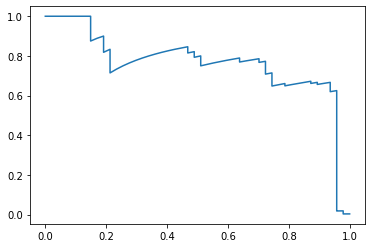

In [35]:
plt.plot(recall, precision)
plt.show()

Could also just skipped all of the above by using scikit's `plot_precision_recall_curve` method.

Text(0.5, 1.0, 'Precision-Recall Curve: AP=0.76')

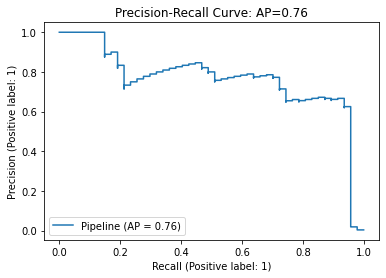

In [36]:
from sklearn.metrics import auc, plot_precision_recall_curve

disp = plot_precision_recall_curve(logistic_pipeline, X_test, y_test)
disp.ax_.set_title('Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 8. Conclusion
The closer to 1.0, the closer we are to solving the problem. That said, when it comes to fraud detection, there's a trade-off between precision and recall.

Recall the two measures:
    - Precision: the rate of true positives divided by the sum of true positives and false positives.
    - Recall: number of true positives divided by the sum of true positives and false negatives.
    
In the case of fraud, false positives are much more harmful than false negatives so we should prioritize recall. This shows an opportunity to improve the results to aim for higher results. Given that this is my first machine learning project done outside of the classroom, I believe this is an acceptable first start :)

Source: https://towardsdatascience.com/precision-vs-recall-evaluating-model-performance-in-credit-card-fraud-detection-bb24958b2723

## 9. Enhancements

Coming soon.

Initial thoughts:
- Incorporate different models to see which performs best (e.g., KNN, Decision Tree, Random Forest, Neural Network)
- Incorporate hyperparameter tuning
- Finish processing data for the positive-correlated features identified (V2, V4, V11)
- And more...